In [84]:
#Importing Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [85]:
# To see list of files
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(filename))

features.csv
stores.csv
test.csv
train.csv


In [86]:
# Importing data
features = pd.read_csv('data/features.csv')
stores = pd.read_csv('data/stores.csv')
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

In [87]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [88]:
# Features Data
print('\033[1;34m{0}\n'.format(features.shape))
print('\033[1;30m{0}\n'.format(features.dtypes))
print('\033[1;32m{0}\n'.format(features.head()))
print('\033[1;33m{0}\n'.format(features.isna().sum()))

(8190, 12)

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  

In [89]:
# stores Data
print('\033[1;34m{0}\n'.format(stores.shape))
print('\033[1;30m{0}\n'.format(stores.dtypes))
print('\033[1;32m{0}\n'.format(stores.head()))
print('\033[1;33m{0}\n'.format(stores.isna().sum()))

(45, 3)

Store     int64
Type     object
Size      int64
dtype: object

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

Store    0
Type     0
Size     0
dtype: int64



In [90]:
# train Data
print('\033[1;34m{0}\n'.format(train.shape))
print('\033[1;30m{0}\n'.format(train.dtypes))
print('\033[1;32m{0}\n'.format(train.sample(4)))
print('\033[1;33m{0}\n'.format(train.isna().sum()))

(421570, 5)

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

        Store  Dept        Date  Weekly_Sales  IsHoliday
184839     19    72  2012-09-14      65049.30      False
319964     33    95  2010-03-19      26212.94      False
22887       3    19  2010-02-19        646.34      False
55292       6    54  2010-03-26        115.97      False

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64



In [91]:
# Transforming Date to date time type
train['Date'] =pd.to_datetime(train['Date'], format="%Y-%m-%d")
features['Date'] =pd.to_datetime(features['Date'], format="%Y-%m-%d")
test['Date'] = pd.to_datetime(test['Date'], format="%Y-%m-%d")

In [92]:
# Handling missed values
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

# Updating non-negative numbers
train['Weekly_Sales'][train['Weekly_Sales'] < 0] = 0
features['MarkDown1'][features['MarkDown1'] < 0] = 0
features['MarkDown2'][features['MarkDown2'] < 0] = 0
features['MarkDown3'][features['MarkDown3'] < 0] = 0
features['MarkDown4'][features['MarkDown4'] < 0] = 0
features['MarkDown5'][features['MarkDown5'] < 0] = 0

# Adding new columns Day, Month, year
train['Date'] = pd.to_datetime(train['Date'])
train['Day'] = train['Date'].dt.day
train['Month'] = train['Date'].dt.month
train['Year'] = train['Date'].dt.year
train['Week'] = train['Date'].dt.week

test['Date'] = pd.to_datetime(test['Date'])
test['Day'] = test['Date'].dt.day
test['Month'] = test['Date'].dt.month
test['Year'] = test['Date'].dt.year
test['Week'] = test['Date'].dt.week

In [93]:
# combining train Data
complete_train_data = pd.merge(train, stores, how = 'left', on = 'Store')
complete_train_data = pd.merge(complete_train_data, features, how = 'inner', on = ['Store','Date','IsHoliday'])
# train Data
print('\033[1;34m{0}\n'.format(complete_train_data.shape))
print('\033[1;30m{0}\n'.format(complete_train_data.dtypes))
print('\033[1;32m{0}\n'.format(complete_train_data.sample(4)))
print('\033[1;33m{0}\n'.format(complete_train_data.isna().sum()))

(421570, 20)

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Day                      int64
Month                    int64
Year                     int64
Week                     int64
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object

        Store  Dept       Date  Weekly_Sales  IsHoliday  Day  Month  Year  \
173192     18    58 2011-09-23       4022.50      False   23      9  2011   
168270     18    58 2010-05-07       2330.00      False    7      5  2010   
375351     40     9 2011-04-22      17790.43      False   22      4  2011   
355511     38     1 2010-10-15       6623.3

In [94]:
# combining Test Data
complete_test_data = pd.merge(test, stores, how = 'left', on = 'Store')
complete_test_data = pd.merge(complete_test_data, features, how = 'inner', on = ['Store','Date','IsHoliday'])
# train Data
print('\033[1;34m{0}\n'.format(complete_test_data.shape))
print('\033[1;30m{0}\n'.format(complete_test_data.dtypes))
print('\033[1;32m{0}\n'.format(complete_test_data.sample(4)))
print('\033[1;33m{0}\n'.format(complete_test_data.isna().sum()))

(115064, 19)

Store                    int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                 bool
Day                      int64
Month                    int64
Year                     int64
Week                     int64
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object

        Store  Dept       Date  IsHoliday  Day  Month  Year  Week Type  \
88811      34    41 2013-03-29      False   29      3  2013    13    A   
69794      26    27 2013-07-12      False   12      7  2013    28    A   
110830     44    80 2012-12-28       True   28     12  2012    52    C   
88804      34    33 2013-03-29      False   29      3  2013    13    A   

          S

In [95]:
print('\033[1;32m{0}\n'.format(complete_test_data.describe()))

               Store           Dept            Day          Month  \
count  115064.000000  115064.000000  115064.000000  115064.000000   
mean       22.238207      44.339524      15.583536       5.729855   
std        12.809930      30.656410       8.844900       3.590331   
min         1.000000       1.000000       1.000000       1.000000   
25%        11.000000      18.000000       8.000000       3.000000   
50%        22.000000      37.000000      15.000000       5.000000   
75%        33.000000      74.000000      23.000000       7.000000   
max        45.000000      99.000000      31.000000      12.000000   

                Year           Week           Size    Temperature  \
count  115064.000000  115064.000000  115064.000000  115064.000000   
mean     2012.767182      23.050963  136497.688921      53.941804   
std         0.422629      15.750407   61106.926438      18.724153   
min      2012.000000       1.000000   34875.000000      -7.290000   
25%      2013.000000      10.0000

Store               AxesSubplot(0.125,0.71587;0.133621x0.16413)
Dept             AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Weekly_Sales      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Day              AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Month            AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Year               AxesSubplot(0.125,0.518913;0.133621x0.16413)
Week            AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Size             AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Temperature     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Fuel_Price      AxesSubplot(0.766379,0.518913;0.133621x0.16413)
MarkDown1          AxesSubplot(0.125,0.321957;0.133621x0.16413)
MarkDown2       AxesSubplot(0.285345,0.321957;0.133621x0.16413)
MarkDown3        AxesSubplot(0.44569,0.321957;0.133621x0.16413)
MarkDown4       AxesSubplot(0.606034,0.321957;0.133621x0.16413)
MarkDown5       AxesSubplot(0.766379,0.321957;0.133621x0.16413)
CPI                   AxesSubplot(0.125,

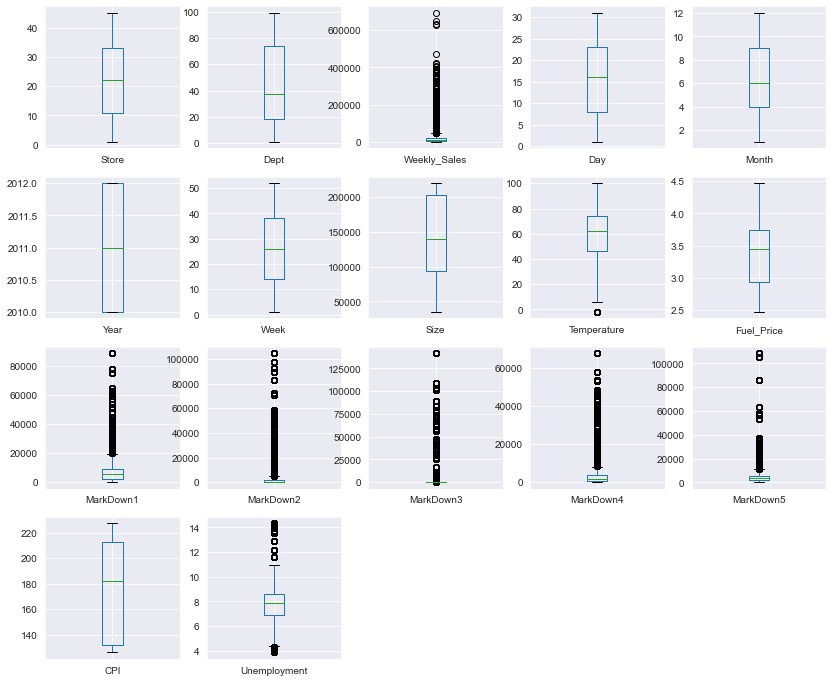

In [96]:
# Identify outliers
complete_train_data.plot(kind='box',subplots=1,layout=(4,5),figsize=(14,12))

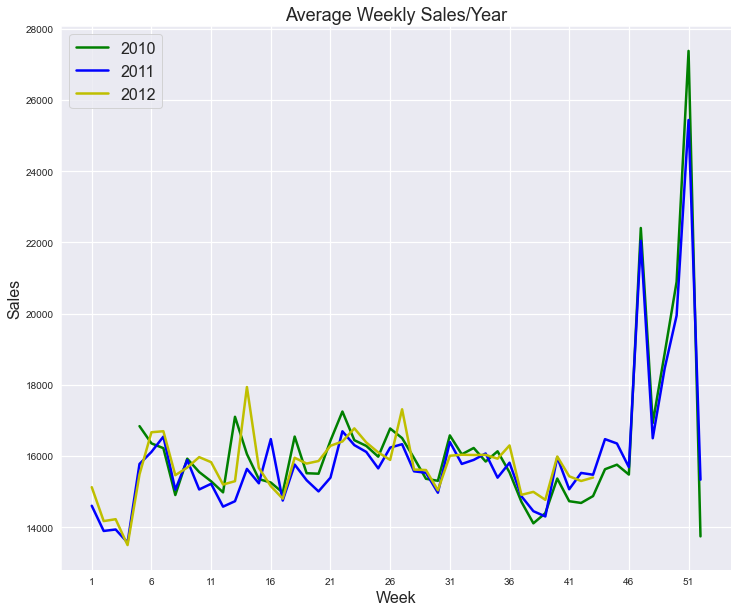

In [97]:
weekly_sales_2010 = complete_train_data[complete_train_data.Year==2010]['Weekly_Sales'].groupby(complete_train_data['Week']).mean()
weekly_sales_2011 = complete_train_data[complete_train_data.Year==2011]['Weekly_Sales'].groupby(complete_train_data['Week']).mean()
weekly_sales_2012 = complete_train_data[complete_train_data.Year==2012]['Weekly_Sales'].groupby(complete_train_data['Week']).mean()
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values, color='g', linewidth=2.5,markers = ["o","<"])
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values, color='b', linewidth=2.5,markers = ["o","<"])
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values, color='y', linewidth=2.5, markers = ["o","<"])
plt.xticks(np.arange(1, 53, step=5))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales/Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.grid(lw = 1.25)
plt.show()

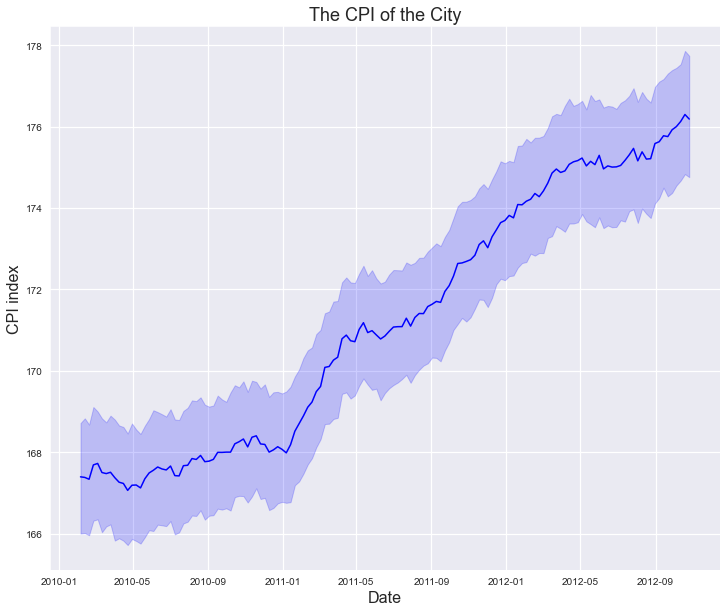

In [98]:
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.lineplot(x = 'Date', y = 'CPI', data = complete_train_data, palette = 'mako', color='b')
plt.title('The CPI of the City', fontsize=18)
plt.ylabel('CPI index', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.grid(lw = 1.25)
plt.show()

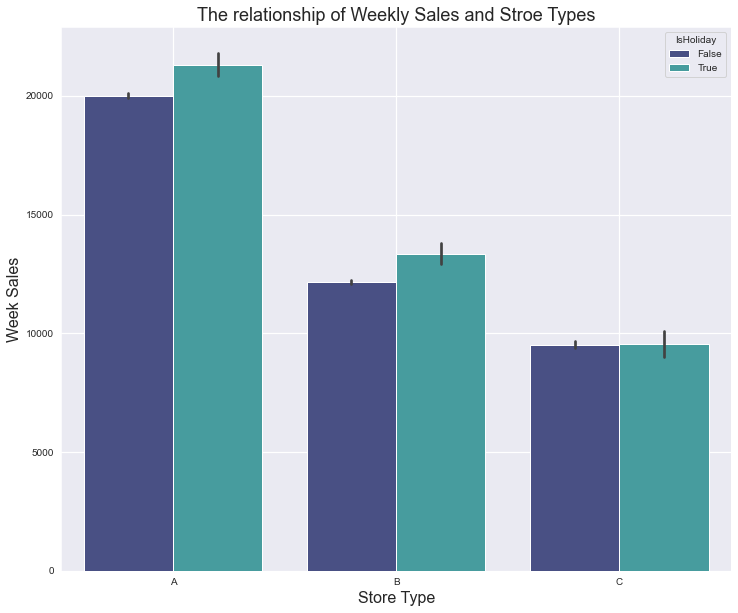

In [99]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
ax3 = sns.barplot(y = 'Weekly_Sales', x = 'Type', hue = 'IsHoliday', data = complete_train_data, palette = 'mako')
plt.title('The relationship of Weekly Sales and Stroe Types', fontsize=18)
plt.ylabel('Week Sales', fontsize=16)
plt.xlabel('Store Type', fontsize=16)
plt.grid(lw = 1.25)
plt.show()

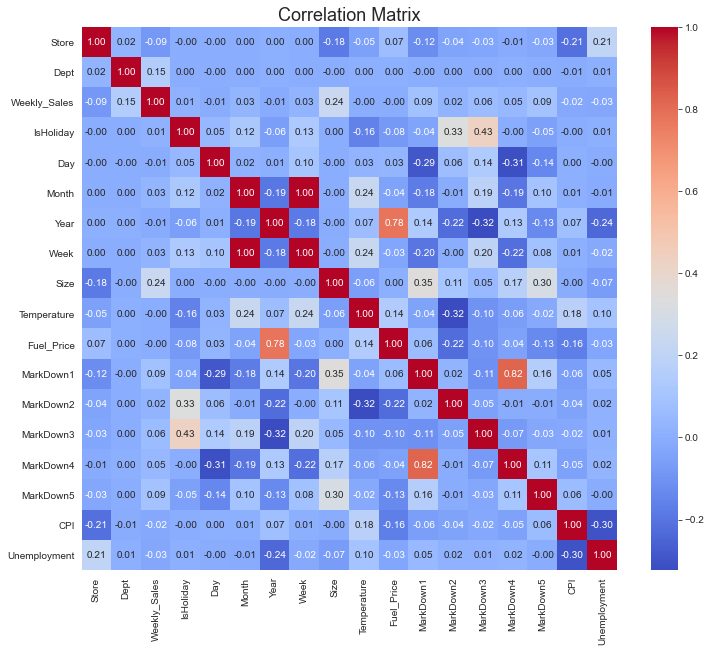

In [100]:
corr = complete_train_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot = True, fmt = '.2f',cmap = 'coolwarm')
plt.title('Correlation Matrix', fontsize=18)
plt.show()

In [101]:
# Dropping non-important features
features_to_drop = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Fuel_Price']
train = complete_train_data.drop(features_to_drop,axis=1)
train.replace({'A': 1, 'B': 2,'C':3},inplace=True) 
test = complete_test_data.drop(features_to_drop,axis=1)
test.replace({'A': 1, 'B': 2,'C':3},inplace=True) 

# Dropping Nan
train.dropna(inplace=True)
test.dropna(inplace=True)

# Splitting data
from sklearn.model_selection import train_test_split
X = train.loc[:, train.columns != 'Weekly_Sales'].drop('Date',axis=1)
y = train.loc[:, train.columns == 'Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# RandomForestRegressor

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
rf = RandomForestRegressor(n_estimators=50,criterion='mse')
model_rf = rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred_rf)))

3450.4510019416048


In [103]:
accuracy = model_rf.score(X_test, y_test)
print(accuracy)

0.9772918988139737


# LinearRegression

In [105]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression() 
model_lr.fit(X_train, y_train)
accuracy = model_lr.score(X_test, y_test)
y_pred_lr = model_lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

21851.36643343091


In [106]:
accuracy = model_lr.score(X_test, y_test)
print(accuracy)

0.08927702779504776


In [ ]:
#To retrieve the intercept:
print(model_lr.intercept_)

In [ ]:
#For retrieving the slope:
print(model_lr.coef_)

In [ ]:
y_pred = model_lr.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})
df

# xgboost

In [107]:
import xgboost
model_xgb = xgboost.XGBRegressor(random_state=42, n_jobs=-1)
model_xgb.fit(X_train, y_train)
accuracy = model_xgb.score(X_test, y_test)
y_pred_xgb = model_xgb.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred_xgb)))

5139.961522809854


In [108]:
accuracy = model_xgb.score(X_test, y_test)
print(accuracy)

0.9496094814651457


# KNeighborsRegressor

In [109]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
model_knn.fit(X_train,y_train)
y_pred_knn = model_knn.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred_knn)))

17634.444540411743


In [110]:
accuracy = model_knn.score(X_test, y_test)
print(accuracy)

0.40686621708892756


# KDecisionTreeRegressor

In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train,y_train)
y_pred_dtr = model_dtr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred_dtr)))

4539.1547354293425


In [112]:
accuracy = model_dtr.score(X_test, y_test)
print(accuracy)

0.9607012201211287


# LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [ ]:
embed_dim = 128
lstm_out = 200
batch_size = 32

model_lstm = Sequential()
model_lstm.add(Embedding(2500, embed_dim, input_length = X.shape[1], dropout = 0.2))
model_lstm.add(LSTM(lstm_out, dropout_U = 0.2, dropout_W = 0.2))
model_lstm.add(Dense(1,activation='softmax'))
model_lstm.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_lstm.summary())

In [ ]:
model_lstm.fit(X_train, y_train, batch_size =batch_size, nb_epoch = 1,  verbose = 5)
y_pred_lstm = model_lstm.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred_lstm)))